In [38]:
# import the libraries necessary for stock eval
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [39]:
# Group up chosen stocks (Rolls Royce and Auto Trader)
stocks = ['RR.L', 'AUTO.L']

In [40]:
# 2 year date range from now
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)

In [5]:
# Download the data
data = yf.download(stocks, start=start_date, end=end_date)

[*********************100%***********************]  2 of 2 completed


In [9]:
# Extract the 'Close' prices
price_close = data['Close']

In [13]:
# Calculate daily returns
daily_returns = price_close.pct_change()

In [17]:
# Calculate returns in 1 year considering 252 trading days in 1 year
trade_days = 252  
avg_annual_returns = daily_returns.mean() * trade_days

In [35]:
# Calculate annualized std dev
annualized_std = daily_returns.std() * np.sqrt(trade_days)

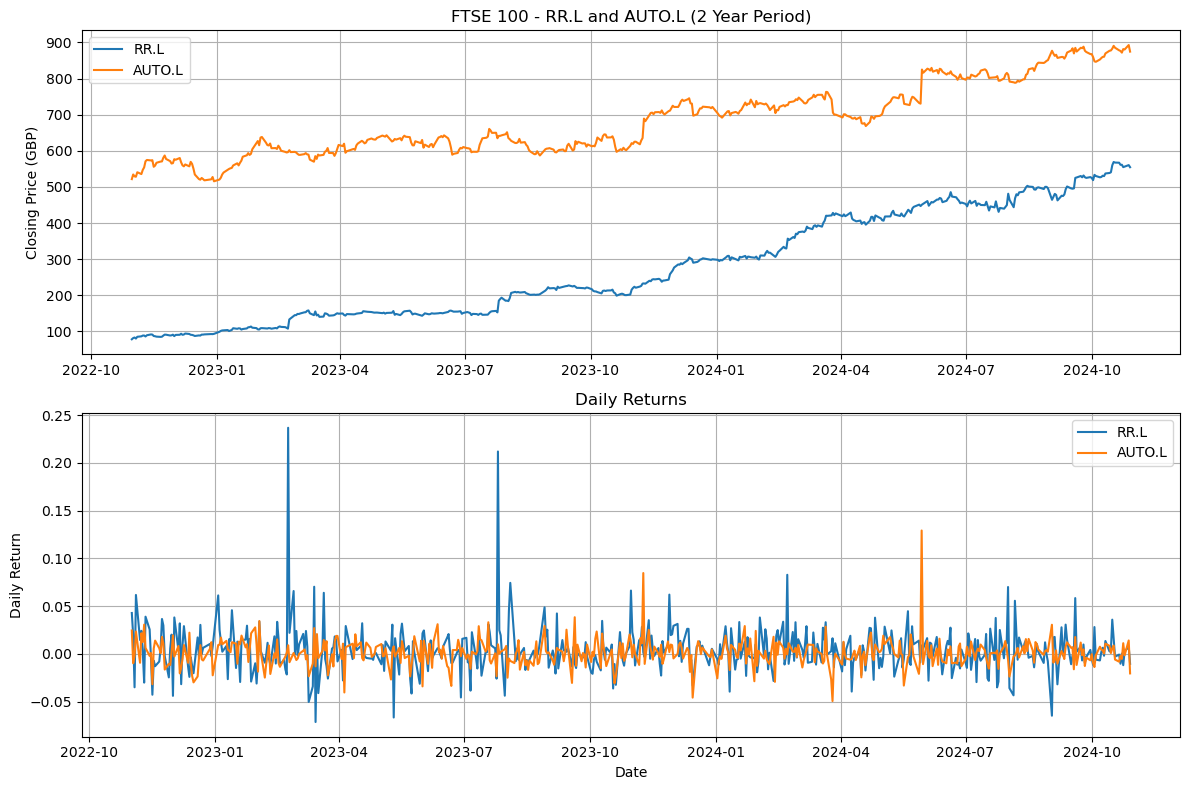

In [36]:
# Plot Size
plt.figure(figsize=(12, 8))

# Subplot 1: Price movements
plt.subplot(2, 1, 1)
for stock in stocks:
    plt.plot(price_close.index, price_close[stock], label=stock)
    
plt.title('FTSE 100 - RR.L and AUTO.L (2 Year Period)')
plt.ylabel('Closing Price (GBP)')
plt.legend()
plt.grid(True)

# Subplot 2: Daily returns
plt.subplot(2, 1, 2)
for stock in stocks:
    plt.plot(daily_returns.index, daily_returns[stock], label=stock)

plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [37]:
# Print annualized average returns and standard deviations
for stock in stocks:
    print("Statistics for ",stock)
    print("Annualized Average Return:", avg_annual_returns[stock])
    print("Annualized Standard Deviation:", annualized_std[stock])
    
# Calculate and print the correlation between the two stocks
correlation = daily_returns['RR.L'].corr(daily_returns['AUTO.L'])
print(f"Correlation between RR.L and AUTO.L daily returns: {correlation:.4f}")

Statistics for  RR.L
Annualized Average Return: 1.0568505993626203
Annualized Standard Deviation: 0.39680768709887093
Statistics for  AUTO.L
Annualized Average Return: 0.28362561026216243
Annualized Standard Deviation: 0.22570009605288335
Correlation between RR.L and AUTO.L daily returns: 0.2147
